# Facebook Prophet

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from fbprophet import Prophet
from prophet.diagnostics import performance_metrics

In [2]:
# Importing the data set
df = pd.read_excel('data/eth_api_data.xlsx')

#Setting up naming conventions for Prophet
df.rename(columns={'t': 'ds', 'price_usd_close': 'y'}, inplace=True)
df

,ds,count,sending_count,receiving_count,active_count,new_non_zero_count,block_height,sopr,y,marketcap_usd,difficulty_latest,hash_rate_mean
0,2015-08-08,10641,582,439,800,353,55869,0.459823,0.769981,8.983510e+07,1606016380751,9.644985e+10
1,2015-08-09,10894,457,489,731,253,60992,0.403942,0.719830,5.507245e+07,1741399466631,1.013969e+11
2,2015-08-10,11543,804,749,997,649,66247,0.360587,0.700705,4.878861e+07,1948102094734,1.116431e+11
3,2015-08-11,13432,2119,2106,2339,1889,71527,0.614763,1.088361,5.745360e+07,2171897473895,1.240757e+11
4,2015-08-12,13744,565,673,904,312,76651,0.609176,1.214071,8.079017e+07,2248237602936,1.308930e+11
...,...,...,...,...,...,...,...,...,...,...,...,...
2221,2021-09-10,127802200,252036,283405,517875,94743,13201142,1.014722,3212.099640,3.949930e+11,9058536219278930,6.606451e+14
2222,2021-09-11,127899284,323971,276903,583239,97084,13207538,1.031268,3266.273666,3.857475e+11,8871958334513730,6.606939e+14
2223,2021-09-12,127999235,278421,282523,524894,99951,13214076,1.048310,3410.418612,3.962536e+11,9209589988362140,6.851246e+14
2224,2021-09-13,128090204,339793,265046,583723,90969,13220488,1.021964,3289.677335,3.828427e+11,9046425212819710,6.622349e+14


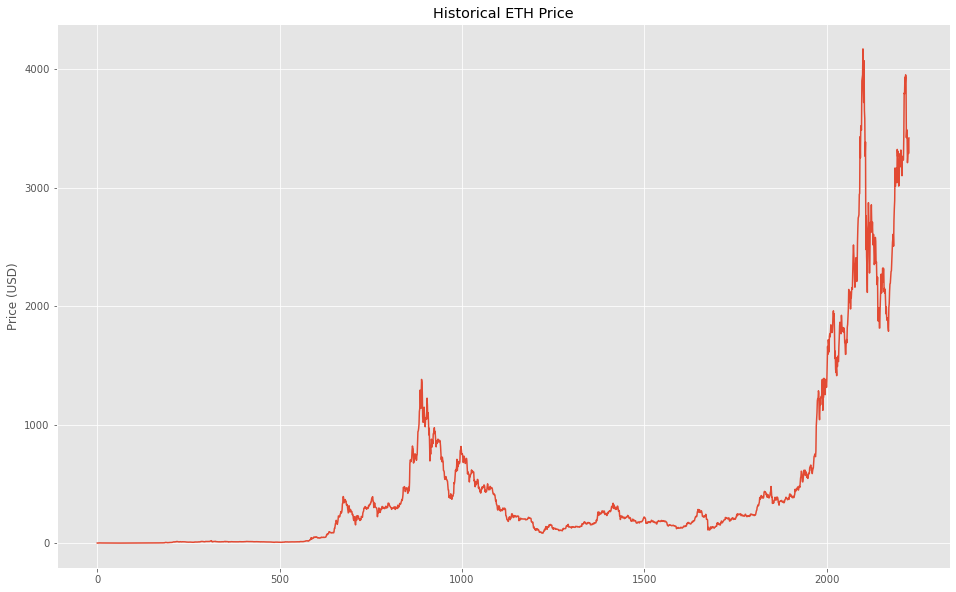

In [3]:
# Plotting historical ETH prices
df.y.plot(figsize=(16,10))

plt.xlabel('')
plt.ylabel('Price (USD)')
plt.title('Historical ETH Price')
plt.show();

In [4]:
# Instantiating the Prophet model
model = Prophet(interval_width=0.95)

# Fitting the model to the data set
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
# Setting up a variable for making predictions 30 days out
future = model.make_future_dataframe(periods=30, freq='D')
future.tail()

,ds
2251,2021-10-10
2252,2021-10-11
2253,2021-10-12
2254,2021-10-13
2255,2021-10-14


In [6]:
# Making the predictions
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2251,2021-10-10,3267.580039,2818.031349,3522.414484,3246.565953,3288.594297,-114.124925,-114.124925,-114.124925,1.056375,1.056375,1.056375,-115.181300,-115.181300,-115.181300,0.0,0.0,0.0,3153.455114
2252,2021-10-11,3274.622138,2763.946152,3541.070399,3252.335253,3296.541831,-113.992971,-113.992971,-113.992971,1.532525,1.532525,1.532525,-115.525496,-115.525496,-115.525496,0.0,0.0,0.0,3160.629167
2253,2021-10-12,3281.664237,2778.993458,3566.815296,3258.100674,3305.118459,-114.972161,-114.972161,-114.972161,0.910507,0.910507,0.910507,-115.882668,-115.882668,-115.882668,0.0,0.0,0.0,3166.692075
2254,2021-10-13,3288.706335,2797.934954,3551.291951,3263.197450,3313.677802,-116.046437,-116.046437,-116.046437,0.228271,0.228271,0.228271,-116.274708,-116.274708,-116.274708,0.0,0.0,0.0,3172.659898
2255,2021-10-14,3295.748434,2777.597682,3561.148698,3268.727857,3322.477996,-118.731652,-118.731652,-118.731652,-2.010648,-2.010648,-2.010648,-116.721004,-116.721004,-116.721004,0.0,0.0,0.0,3177.016782


### Plotting Values
* Blue Line = Forecasted Values
* Black Dots = Observed Values
* Uncertainty Invervals = Blue Shaded Region

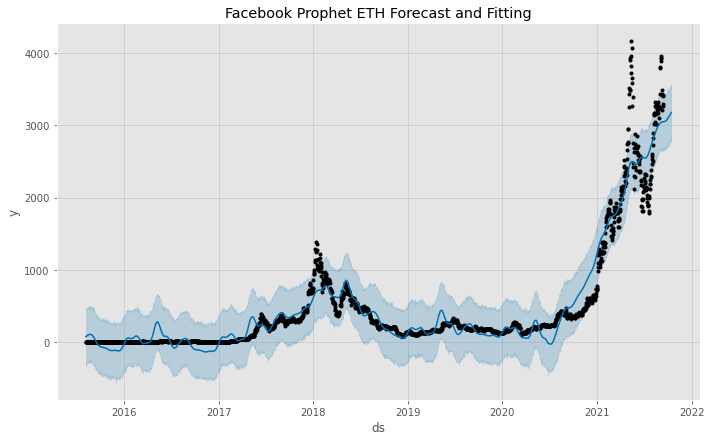

In [7]:
model.plot(forecast, uncertainty=True)
plt.title('Facebook Prophet ETH Forecast and Fitting')
plt.savefig('images/fb_prophet_fc_fit.png')
plt.show()

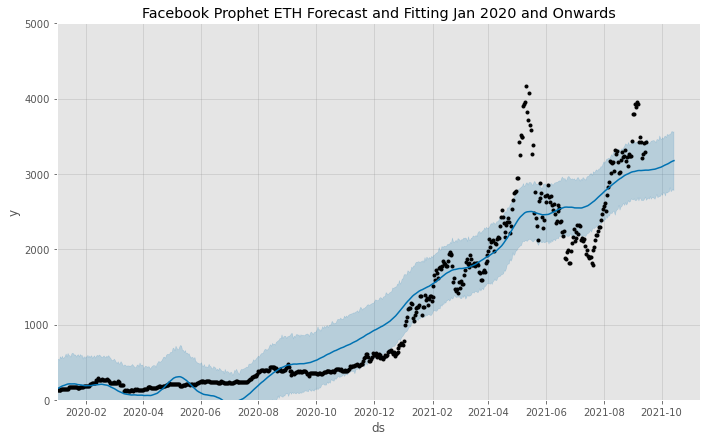

In [8]:
# Zooming in on the above graph
model.plot(forecast, uncertainty=True)

plt.title('Facebook Prophet ETH Forecast and Fitting Jan 2020 and Onwards')
plt.xlim('2020-01-01', '2021-11-11')
plt.ylim([0, 5000])
plt.savefig('images/fb_prophet_fc_zoomed.png')
plt.show()

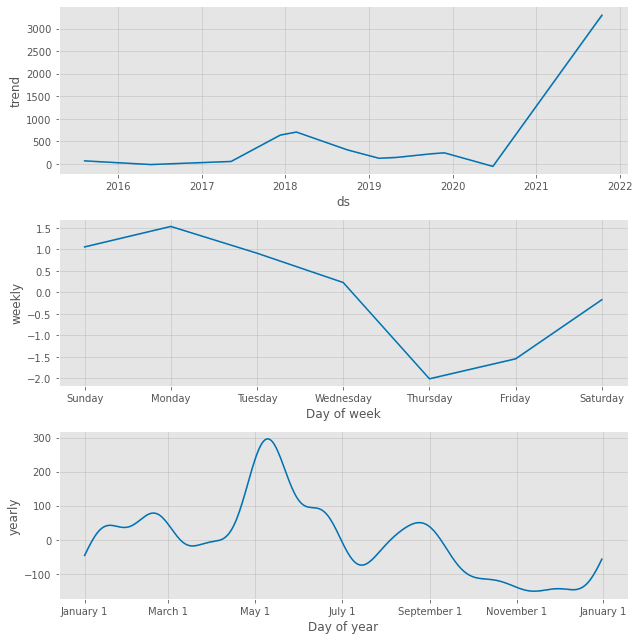

In [9]:
# Plotting components of the forecasts
model.plot_components(forecast)
plt.show();